# 0. Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from keras import backend as K
from keras.models import load_model
K.set_image_dim_ordering('tf')
import h5py

Using TensorFlow backend.
C:\Users\hugob\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hugob\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hugob\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hugob\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

# 1. Definition of the CNN architecture

Weights and model loaded in the next part corresponds CNN architecture presented below.

In [15]:
"""
/!\ This code does not work. It is just to show how the ice type CNN is built with Keras /!\

nbr_classes  : number of ice classes
ws  : size of SAR subimages
cs    : size of convolutional filters
cx : number of filters per convolutional layer (x id)
nx    : number of neurons per hidden neural layer number (x id)
dropout_rate : value of dropout
l2_rate      : value of L2 regularisation

"""

nbr_classes = 4  
ws = 50
cs = 3
c1,c2,c3 = 32,32,32
n1,n2,n3 = 16,16,64
dropout_rate = 0.1
l2_rate = 0.001

model = Sequential()

# Convolutional part
model.add(BatchNormalization())
model.add(Conv2D(c1, (cs, cs), activation='relu', input_shape=(ws, ws, 2)))
model.add(MaxPooling2D((2, 2),2))
model.add(Conv2D(c2, (cs, cs), activation='relu'))
model.add(Conv2D(c3, (cs, cs), activation='relu'))
model.add(MaxPooling2D((2, 2),2))
model.add(BatchNormalization())

model.add(Flatten())

# Neural network part (hidden layers)
model.add(Dropout(dropout_rate))
model.add(Dense(n1, kernel_regularizer=l2(l2_rate), activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(n2,kernel_regularizer=l2(l2_rate), activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(n3,kernel_regularizer=l2(l2_rate), activation='relu'))
model.add(Dropout(dropout_rate))

# Last neural layer (not hidden)
model.add(Dense(nbr_classes,kernel_regularizer=l2(l2_rate), activation='softmax'))

NameError: name 'Sequential' is not defined

# 2. CNN application

You can find below the test region which is proposed in the notebook to apply the CNN.

### HV SAR image

<img src="HV_SAR.PNG" width="700" height="1200" />

### HH SAR image

<img src="HH_SAR.PNG" width="700" height="1200" />

### 2.1. Import the 50x50x2 SAR subimages

In [17]:
data = np.load('CNN_data.npz')

# get 50x50x2 SAR subimages
cnn_samples = data['HH_HV']

# mask size is used to build the ice chart after CNN predicitons. it corresponds to the original size of the entire SAR image
mask_size = data['mask_size']

### 2.2. Load model and trained weights

In [7]:
model = load_model('model.hdf5')
model.compile
model.load_weights("weights.hdf5")

### 2.3. CNN predicitons

In [8]:
class_prediction = model.predict_classes(cnn_samples)
proba_prediction = model.predict(cnn_samples)

### 2.4. Build predicted ice chart

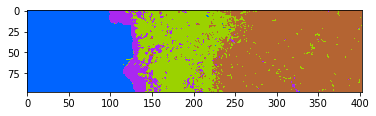

In [9]:
ice_chart = class_prediction.reshape(mask_size[0],mask_size[1])

color_scale = ['#0064FF','#AA28F0','#9BD200','#B46432']
cmap = colors.ListedColormap(color_scale)  

plt.imshow(ice_chart, cmap =cmap)

### 2.5. Build probability map

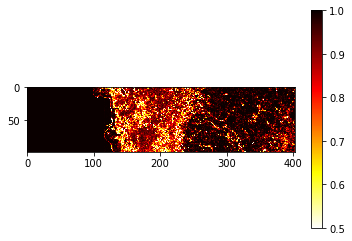

In [16]:
proba_chart = np.max(proba_prediction, axis=1).reshape(mask_size[0],mask_size[1])

plt.imshow(proba_chart, cmap="hot_r", vmin=0.5,vmax = 1)
plt.colorbar()